# Import Libraries

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras import regularizers

In [2]:
np.random.seed(42)
keras.utils.set_random_seed(812)

# Upload Data

In [3]:
train_image_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/train/images'
test_image_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/test/images'
valid_image_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/valid/images'
train_label_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/train/labels'
test_label_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/test/labels'
valid_label_folder = 'C:/Users/User/Desktop/Anomaly_Detection/data/valid/labels'

In [4]:
train_image_files = os.listdir(train_image_folder)
train_images = []
train_labels = []

for file_name in train_image_files:
    image_path = os.path.join(train_image_folder, file_name)
    image = cv2.imread(image_path)
    train_images.append(image)

    label_file_name = os.path.splitext(file_name)[0] + '.txt' 
    label_path = os.path.join(train_label_folder, label_file_name) 
    
    if not os.path.exists(label_path):
        print(f"Label file not found for train image: {file_name}")
        continue
    
    with open(label_path, 'r') as document_file:
        first_char = document_file.read(1)
        if first_char.isdigit():
            label = int(first_char)
    
    train_labels.append(label)
    
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
test_image_files = os.listdir(test_image_folder)
test_images = []
test_labels = []

for file_name in test_image_files:
    image_path = os.path.join(test_image_folder, file_name)
    image = cv2.imread(image_path)
    test_images.append(image)

    label_file_name = os.path.splitext(file_name)[0] + '.txt' 
    label_path = os.path.join(test_label_folder, label_file_name) 
    
    if not os.path.exists(label_path):
        print(f"Label file not found for test image: {file_name}")
        continue
    
    with open(label_path, 'r') as document_file:
        first_char = document_file.read(1)
        if first_char.isdigit():
            label = int(first_char)
    
    test_labels.append(label)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)

C:\Users\User\AppData\Local\Temp\ipykernel_18632\3112823843.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_images = np.array(test_images)


In [6]:
valid_image_files = os.listdir(valid_image_folder)
valid_images = []
valid_labels = [] 

for file_name in valid_image_files:
    image_path = os.path.join(valid_image_folder, file_name)
    image = cv2.imread(image_path)
    valid_images.append(image)

    label_file_name = os.path.splitext(file_name)[0] + '.txt' 
    label_path = os.path.join(valid_label_folder, label_file_name) 
    
    if not os.path.exists(label_path):
        print(f"Label file not found for valid image: {file_name}")
        continue
    
    with open(label_path, 'r') as document_file:
        first_char = document_file.read(1)
        if first_char.isdigit():
            label = int(first_char)
    
    valid_labels.append(label)
    
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Resize

In [7]:
target_size = (224, 224)

resized_train_images = np.zeros((len(train_images), *target_size, 3), dtype=np.uint8)

for i, image in enumerate(train_images):
    resized_image = cv2.resize(image, target_size)  
    resized_train_images[i] = resized_image



# for dilate, label in zip(resized_train_images, train_labels):
#     plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
#     plt.title(f"Train Label: {label}")
#     plt.show()

In [8]:
target_size = (224, 224)

resized_test_images = np.zeros((len(test_images), *target_size, 3), dtype=np.uint8)

for i, image in enumerate(test_images):
    resized_image = cv2.resize(image, target_size)  
    resized_test_images[i] = resized_image



# for dilate, label in zip(resized_test_images, test_labels):
#     plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
#     plt.title(f"test Label: {label}")
#     plt.show()

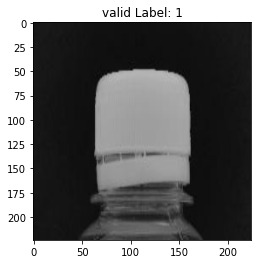

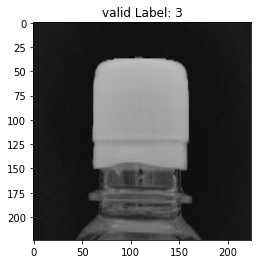

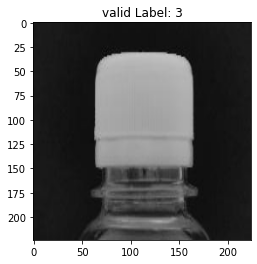

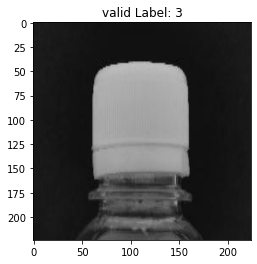

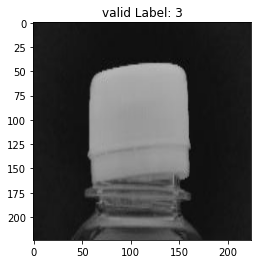

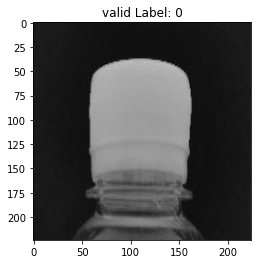

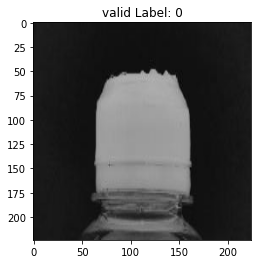

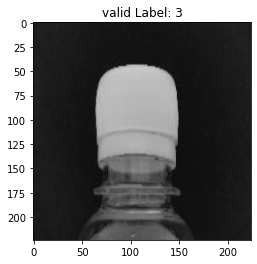

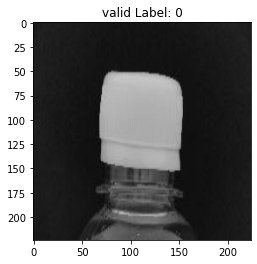

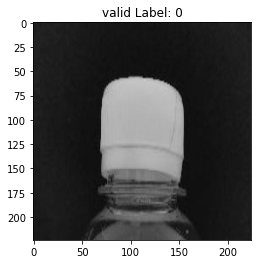

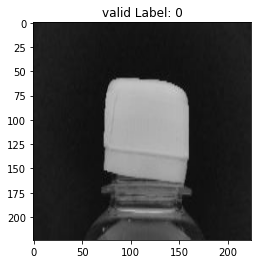

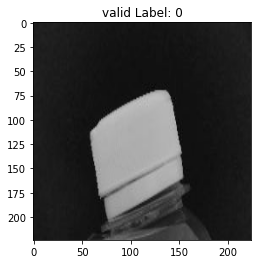

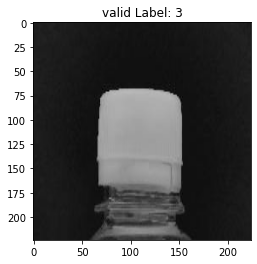

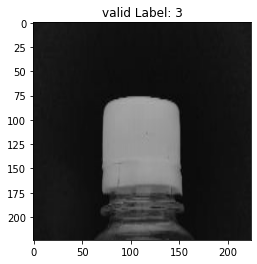

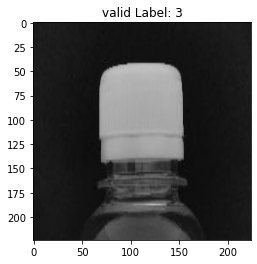

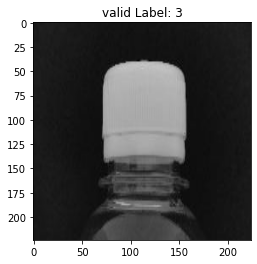

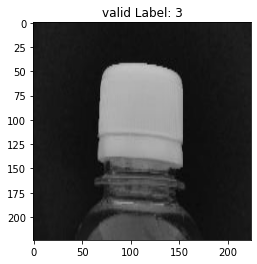

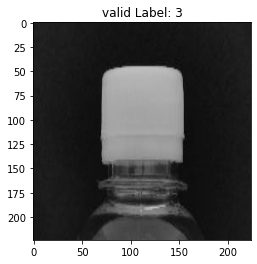

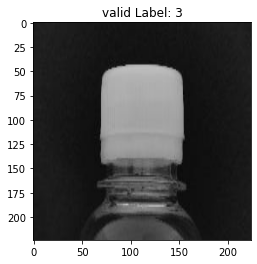

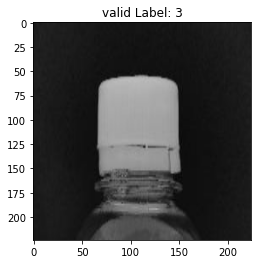

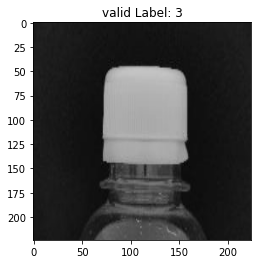

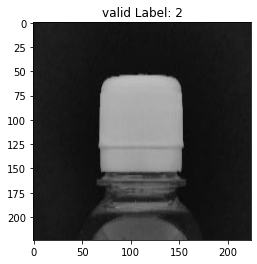

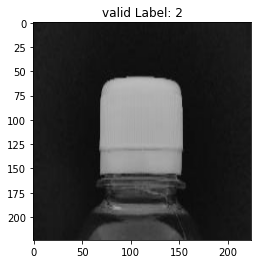

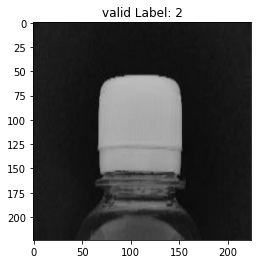

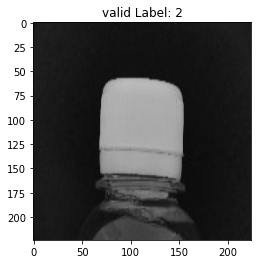

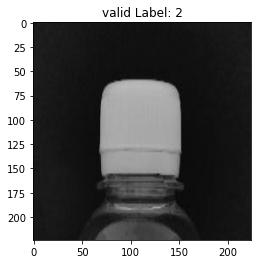

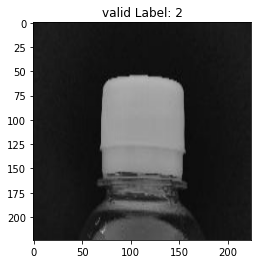

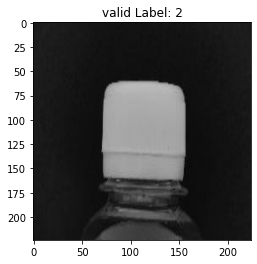

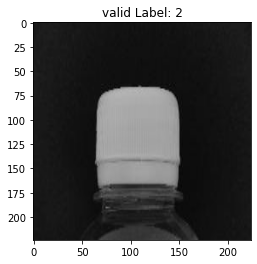

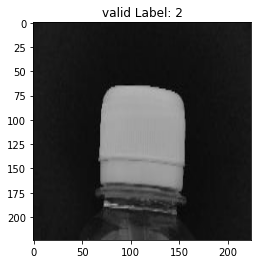

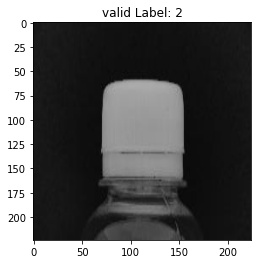

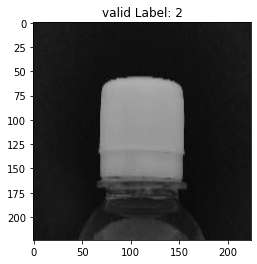

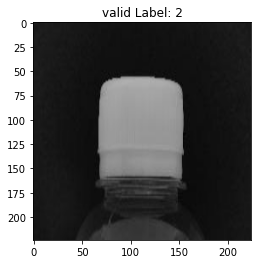

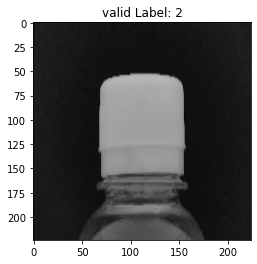

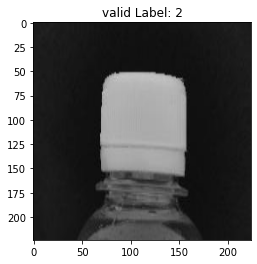

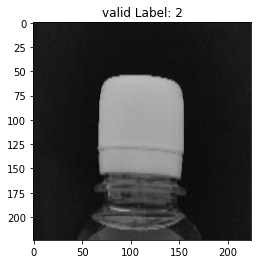

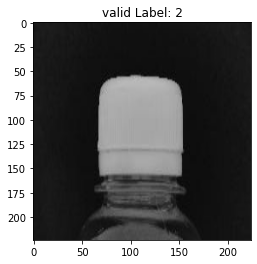

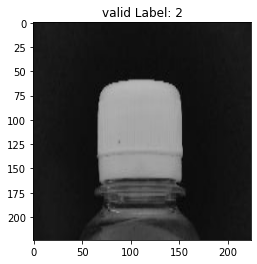

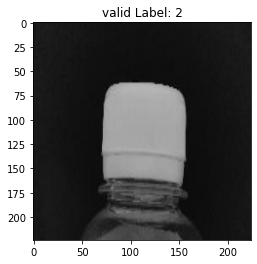

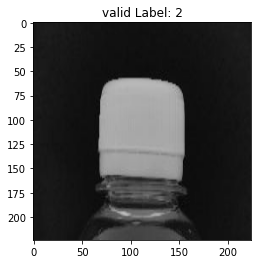

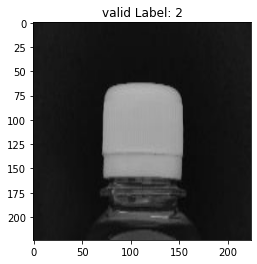

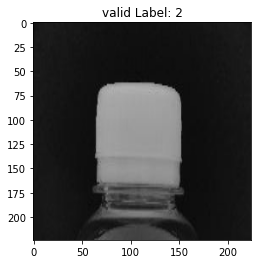

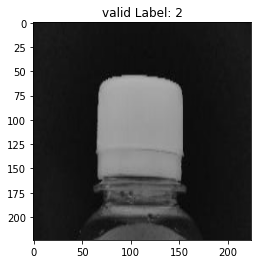

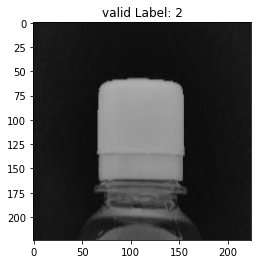

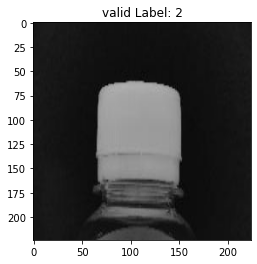

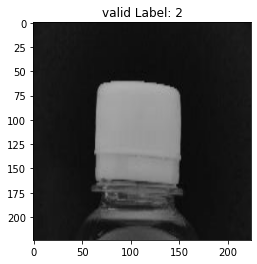

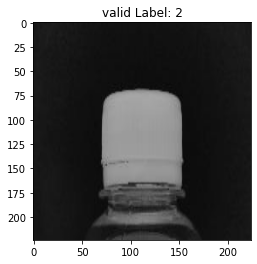

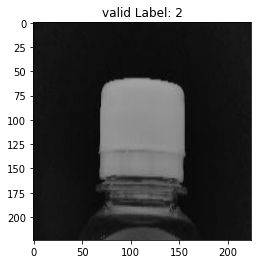

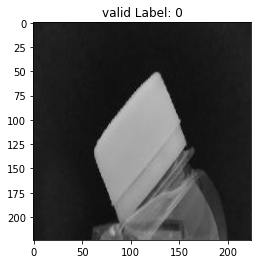

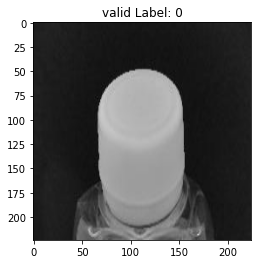

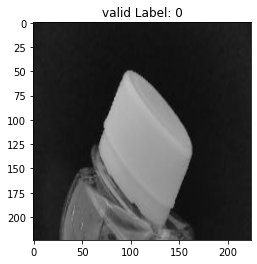

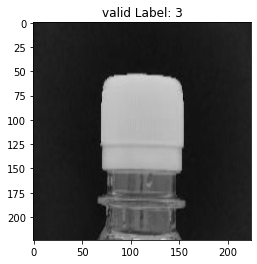

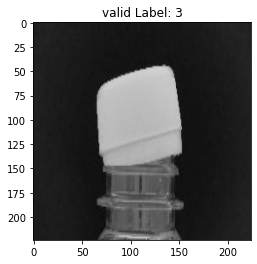

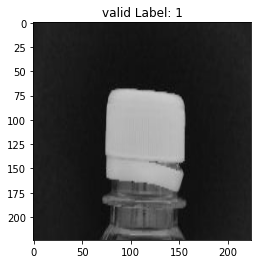

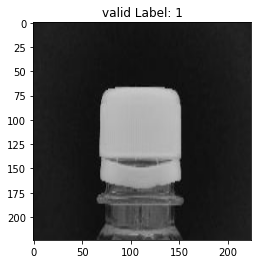

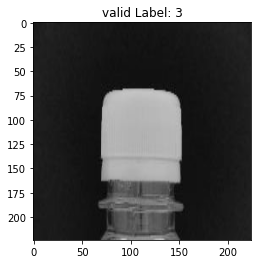

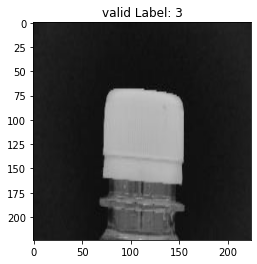

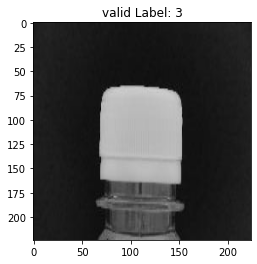

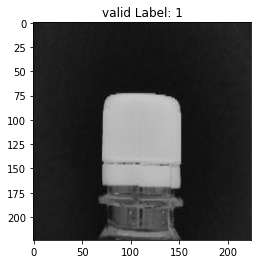

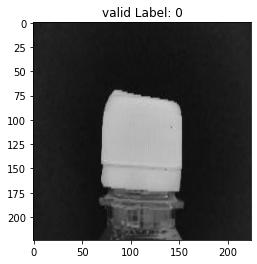

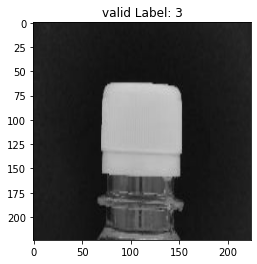

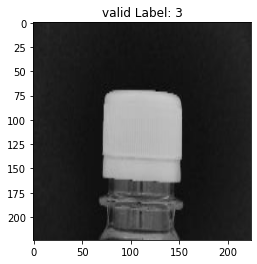

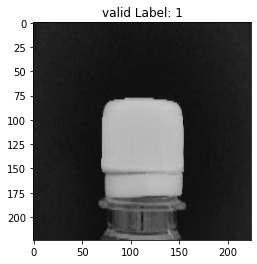

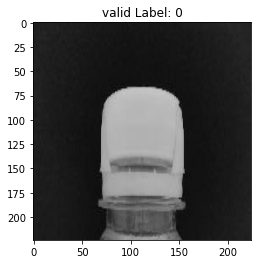

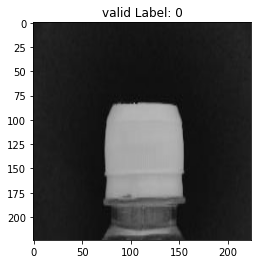

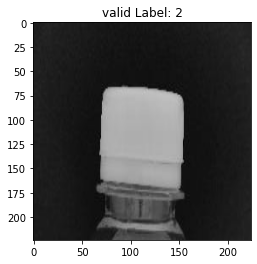

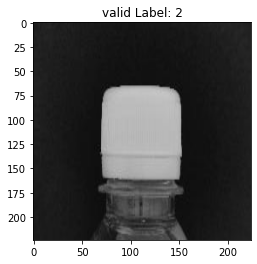

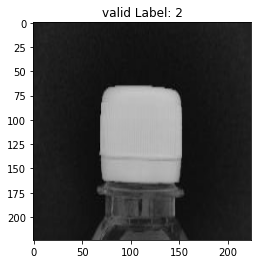

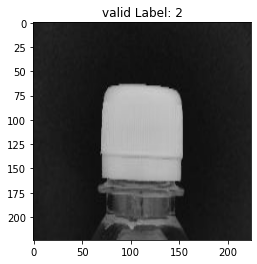

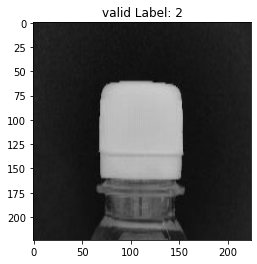

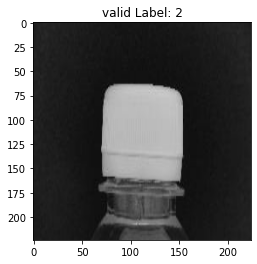

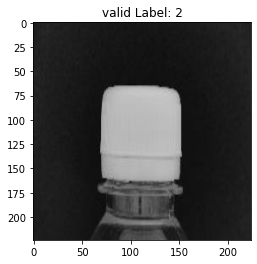

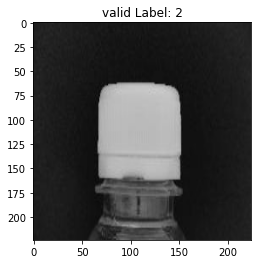

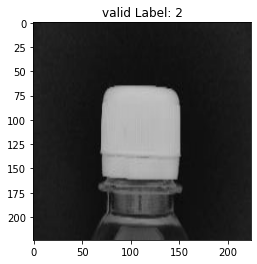

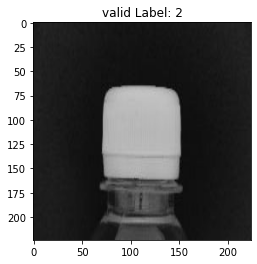

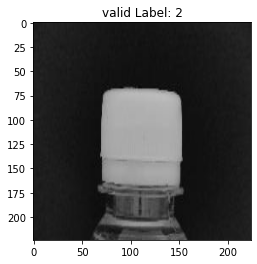

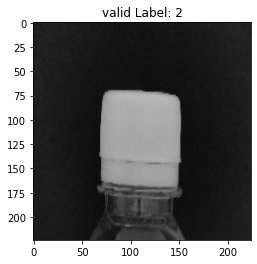

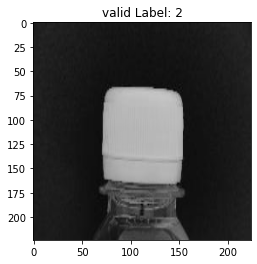

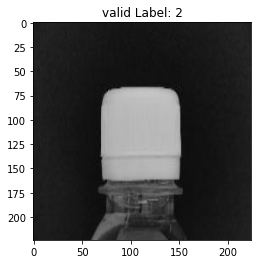

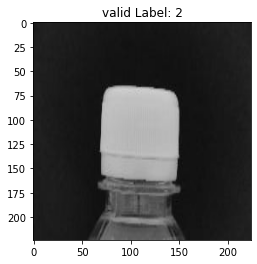

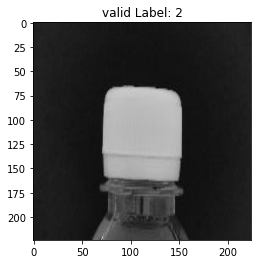

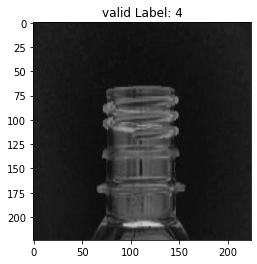

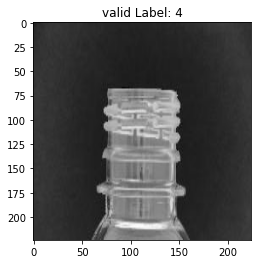

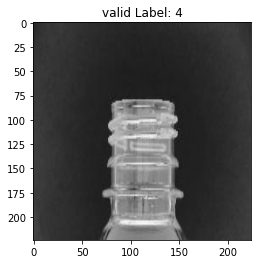

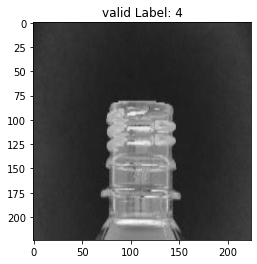

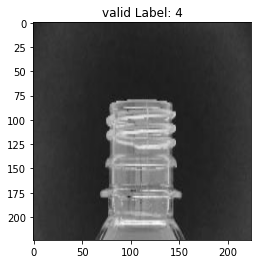

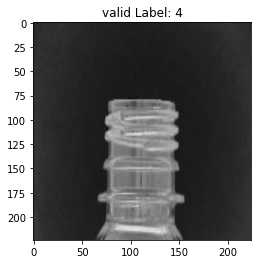

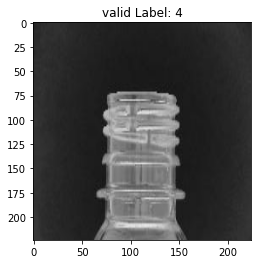

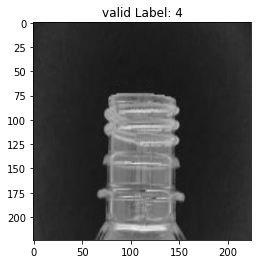

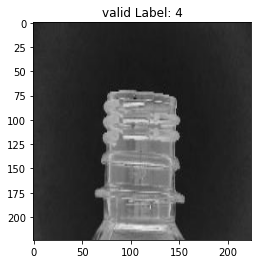

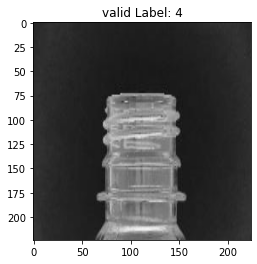

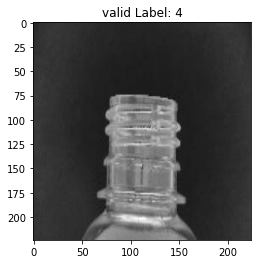

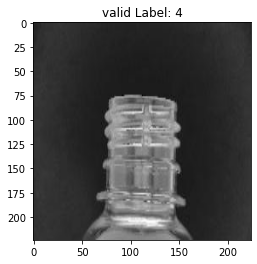

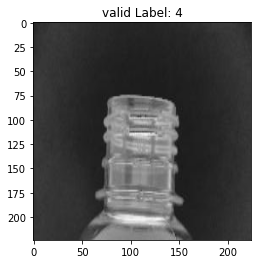

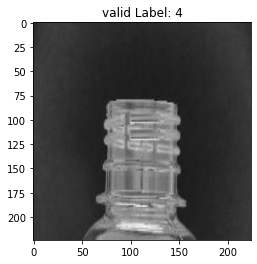

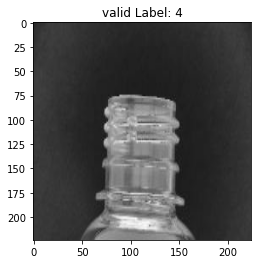

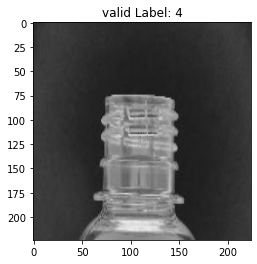

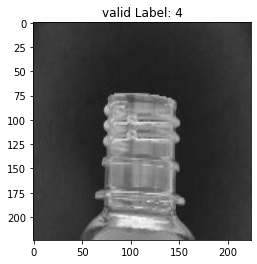

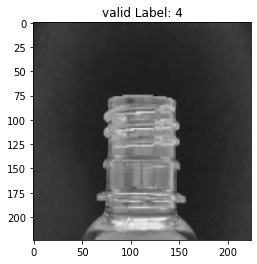

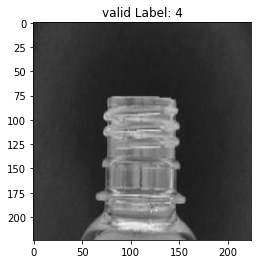

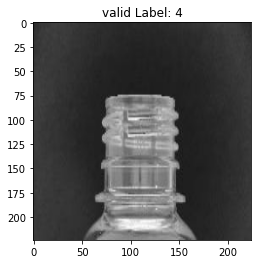

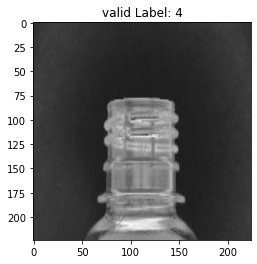

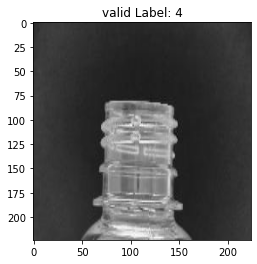

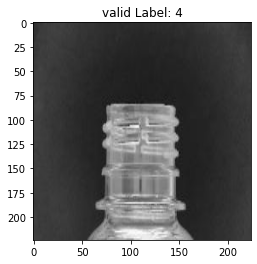

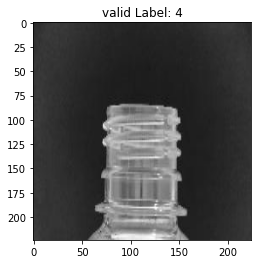

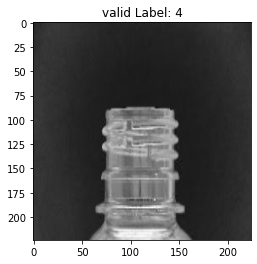

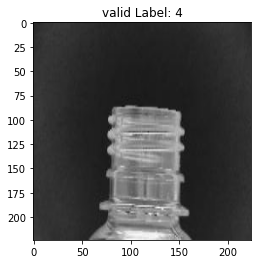

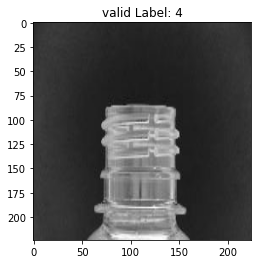

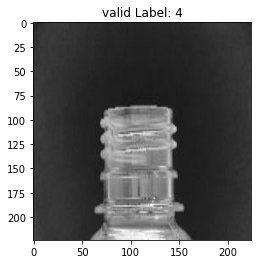

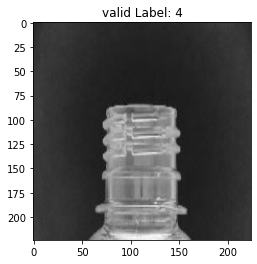

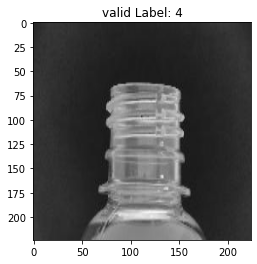

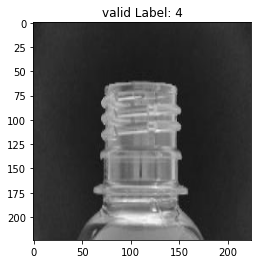

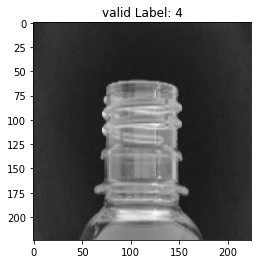

In [9]:
target_size = (224, 224)

resized_valid_images = np.zeros((len(valid_images), *target_size, 3), dtype=np.uint8)

for i, image in enumerate(valid_images):
    resized_image = cv2.resize(image, target_size)  
    resized_valid_images[i] = resized_image



for dilate, label in zip(resized_valid_images, valid_labels):
    plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
    plt.title(f"valid Label: {label}")
    plt.show()

In [10]:
resized_train_images.shape

(398, 224, 224, 3)

In [11]:
resized_test_images.shape

(112, 224, 224, 3)

In [12]:
resized_valid_images.shape

(113, 224, 224, 3)

In [13]:
y_train = np.asarray(train_labels).astype('int').reshape((-1,1))
y_test = np.asarray(test_labels).astype('int').reshape((-1,1))
y_valid = np.asarray(valid_labels).astype('int').reshape((-1,1))

In [14]:
encoder = OneHotEncoder(sparse=False)

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)
y_valid_encoded = encoder.fit_transform(y_valid)

# Model Training

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [16]:
from keras.applications import VGG16
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten(name="flatten")(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(5, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)
                
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
batch_size = 14
train_steps = len(resized_train_images) // batch_size
validation_steps = len(resized_valid_images) // batch_size
epochs = 15

In [19]:
history = model.fit(train_generator.flow(resized_train_images, y_train_encoded, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (resized_valid_images, y_valid_encoded), validation_steps= validation_steps, epochs= epochs)

Epoch 1/15
28/28 [==============================] - 139s 5s/step - loss: 2.6710 - accuracy: 0.4766 - val_loss: 0.9446 - val_accuracy: 0.6372
Epoch 2/15
28/28 [==============================] - 132s 5s/step - loss: 1.1129 - accuracy: 0.5938 - val_loss: 0.7647 - val_accuracy: 0.7522
Epoch 3/15
28/28 [==============================] - 136s 5s/step - loss: 0.8729 - accuracy: 0.6328 - val_loss: 0.7101 - val_accuracy: 0.7345
Epoch 4/15
28/28 [==============================] - 136s 5s/step - loss: 0.8550 - accuracy: 0.6432 - val_loss: 0.6887 - val_accuracy: 0.7434
Epoch 5/15
28/28 [==============================] - 157s 6s/step - loss: 0.7881 - accuracy: 0.6927 - val_loss: 0.5728 - val_accuracy: 0.7876
Epoch 6/15
28/28 [==============================] - 131s 5s/step - loss: 0.7970 - accuracy: 0.6458 - val_loss: 0.5511 - val_accuracy: 0.8230
Epoch 7/15
28/28 [==============================] - 130s 5s/step - loss: 0.6845 - accuracy: 0.7109 - val_loss: 0.5163 - val_accuracy: 0.8584
Epoch 8/15
28

In [20]:
predictions = model.predict(resized_test_images, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test_encoded, axis= 1)

print(classification_report(actuals, predictions, target_names= ['0','1','2','3','4']))

cm = confusion_matrix(actuals, predictions)
print(cm)

8/8 [==============================] - 18s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.00      0.00      0.00        19
           2       0.59      0.96      0.73        23
           3       0.55      0.76      0.64        41
           4       1.00      1.00      1.00        17

    accuracy                           0.64       112
   macro avg       0.63      0.58      0.53       112
weighted avg       0.58      0.64      0.57       112

[[ 2  0  0 10  0]
 [ 0  0  5 14  0]
 [ 0  0 22  1  0]
 [ 0  0 10 31  0]
 [ 0  0  0  0 17]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


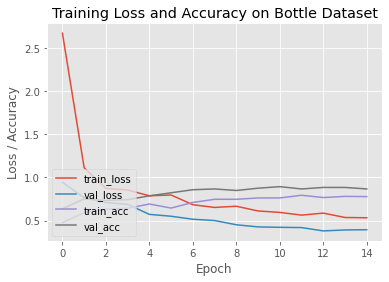

In [21]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Bottle Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")